## Data Preparation and Modelling

### Have a look at the steps that are followed:

- Load the data
- Analysis the data
- Data Preparation
- Training
- Prediction
- Evaluation

### Load the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

E:\Innomatics data sci\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Innomatics data sci\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\Innomatics data sci\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
E:\Innomatics data sci\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
E:\Innomatics data sci\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv(r'E:\Excel_files\Machine Learning\dataframe_.csv')

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
df.shape

(1697, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
# Checking duplicates

df.duplicated().sum()

606

In [7]:
df[df.duplicated()]

,input,output
106,-63.366669,-33.000000
464,112.633331,103.000000
715,-31.366669,-49.000000
819,-117.366669,-75.000000
865,-131.366669,-125.000000
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [8]:
# drop duplicates

df.drop_duplicates(keep = 'first', inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
# for checking the nan value column

[features for features in df.columns if df[features].isna().sum()>0] 

['input', 'output']

In [11]:
# checking null values

df.isnull().sum()

input     1
output    1
dtype: int64

In [12]:
a = round(df.input.mean(),2)
b = round(df.output.mean(),2)
print(a,b)

8.12 -27.38


In [13]:
df.input.replace(np.nan, a, inplace = True)
df.output.replace(np.nan, b, inplace = True)

In [14]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [15]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [16]:
df.shape

(1091, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 25.6 KB


In [18]:
df.dtypes

input     float64
output    float64
dtype: object

In [19]:
# checking skewness

df.skew()

input    -0.283802
output    0.922656
dtype: float64

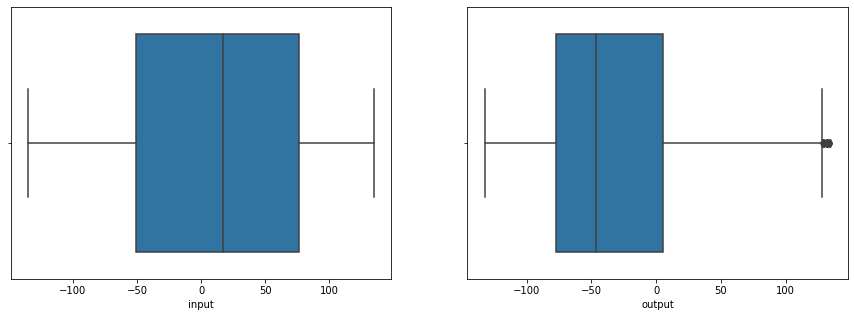

In [20]:
# checking outliers for input & output column

#sns.boxplot(x=df.input)
#sns.boxplot(x= df.output)

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x=df.input);

plt.subplot(122)
sns.boxplot(x=df.output);

In [21]:
# Identify the outliers

Q1,Q2,Q3 = tuple(df.output.quantile(q = [0.25, 0.5, 0.75 ]).values)

In [22]:
print(Q1, Q2, Q3)

-76.9885951 -46.26979181 5.0754008045


In [23]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

82.0639959045 128.17139466125 -200.08458895675


In [24]:
(df[(df.output > UL) | (df.output < LL)]).count()

input     17
output    17
dtype: int64

In [25]:
## cube transformation

output_transformed = df.output**(1/3)
df['output_transformed'] = output_transformed
output_transformed.skew()


-1.0604091448640767

In [26]:
df.head()

,input,output,output_transformed
0,-122.740667,-130.572085,NaN
1,-121.531419,-129.938929,NaN
2,-134.917019,-130.141832,NaN
3,-120.605951,-125.760932,NaN
4,-129.894781,-112.785214,NaN


In [27]:
df['output_transformed'].isnull().sum()


810

<AxesSubplot: xlabel='output'>

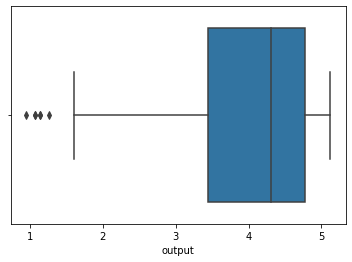

In [28]:
sns.boxplot(x= output_transformed)

In [29]:
df.drop(['output_transformed'], axis =1, inplace = True)

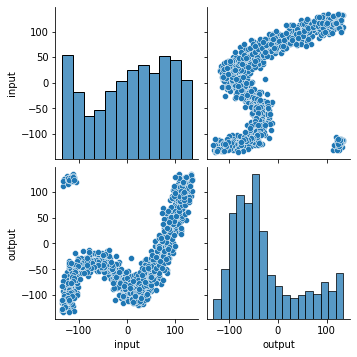

In [30]:
sns.pairplot(df)

In [31]:
df_corr = df.corr()
df_corr

,input,output
input,1.000000,0.504471
output,0.504471,1.000000


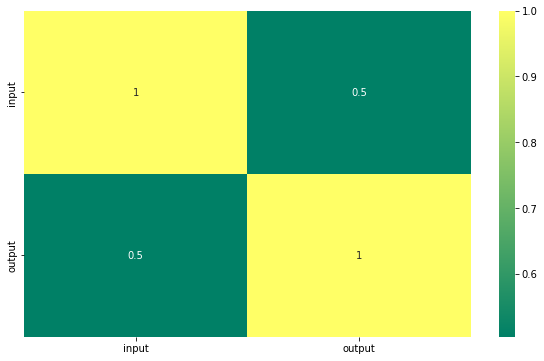

In [32]:
plt.figure(figsize =(10,6))
sns.heatmap(df_corr, cmap = 'summer', annot =True);

## Observation: 

**Input and Output are Positively co-related to each other.** 

## Machine Learning

##  a. Identify Input(X) and output (y)

In [33]:
y = df['output']
X = df[['input']]

## Split the data

In [34]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state= 100)

In [35]:
X_train.head()

,input
603,32.633331
535,80.633331
245,34.475043
690,-6.532765
321,85.241190


In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


In [37]:
X_train.dtypes

input    float64
dtype: object

## b. Scaling the Numerical Features

In [38]:
X_train.head()

,input
603,32.633331
535,80.633331
245,34.475043
690,-6.532765
321,85.241190


In [39]:
# scaling the numeroical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                   columns = X_train.columns,
                                   index = X_train.index)

X_train_transformed.head()

,input
603,0.314222
535,0.918608
245,0.337412
690,-0.178932
321,0.976627


In [40]:
X_train.describe()

,input
count,818.000000
mean,7.677955
std,79.468110
min,-134.962839
25%,-58.027606
50%,17.637363
75%,78.107321
max,134.605775


In [41]:
print('Number of Numerical Feature:', scaler.n_features_in_)
print('Mean of each column:', scaler.mean_)
print('std of each column:', np.sqrt(scaler.var_))

Number of Numerical Feature: 1
Mean of each column: [7.67795509]
std of each column: [79.41952056]


## c. Preparing Test Data

In [42]:
X_test.head()

,input
1004,76.633331
899,7.225553
157,-47.188739
652,-1.374273
469,99.414940


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 1004 to 774
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   273 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [44]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_transformed.head()

,input
1004,0.868242
899,-0.005696
157,-0.690846
652,-0.113980
469,1.155094


## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [46]:
# Prediction

y_test_pred = regressor.predict(X_test_transformed)

In [47]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1004,-15.000000,2.925714
899,-97.376142,-28.910137
157,-67.569154,-53.868799
652,-104.595355,-32.854691
469,85.239286,13.375146


<AxesSubplot: xlabel='output', ylabel='Count'>

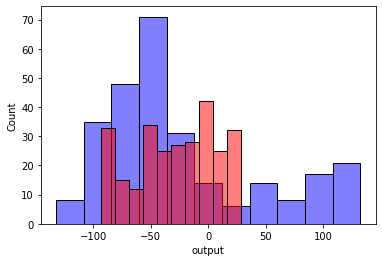

In [48]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [49]:
# Evaluation

from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_LR)

print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

Mean Absolute Error:  46.29072592667424
Mean Squared Error:  3953.225299765986
Root Mean Squared Error:  62.87467932137695


## KNN Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = regressor.predict(X_test_transformed)


temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
1004,-15.000000,-16.511392
899,-97.376142,-80.128677
157,-67.569154,-40.628055
652,-104.595355,-84.383860
469,85.239286,81.201061


<AxesSubplot: xlabel='output', ylabel='Count'>

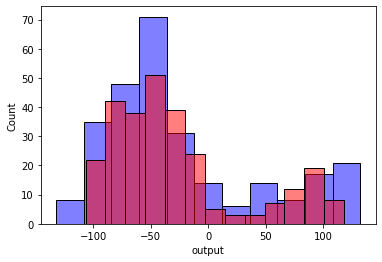

In [51]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [52]:
from sklearn import metrics

MeanAbsoluteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_KNN)

print('Mean Squared Error: ', MeanSquaredError_KNN)

print('Root Mean Squared Error: ', RootMeanSquaredError_KNN)

Mean Absolute Error:  26.97805746722564
Mean Squared Error:  2096.740512236495
Root Mean Squared Error:  45.790179211666064


## Decision Tree Regression

In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
1004,-15.000000,-11.000000
899,-97.376142,-79.156025
157,-67.569154,-50.565111
652,-104.595355,-55.570297
469,85.239286,77.056564


<AxesSubplot: xlabel='output', ylabel='Count'>

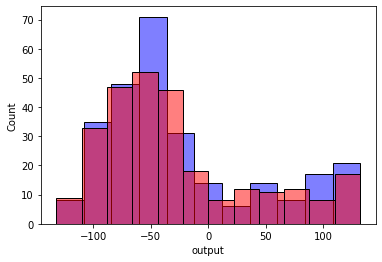

In [54]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [55]:
from sklearn import metrics

MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_DTR)

print('Mean Squared Error: ', MeanSquaredError_DTR)

print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error:  30.908289298655685
Mean Squared Error:  2913.6571939939117
Root Mean Squared Error:  53.978302992905505


## Ensemble

## Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
1004,-15.000000,-19.862057
899,-97.376142,-76.081030
157,-67.569154,-43.643701
652,-104.595355,-68.232073
469,85.239286,66.696302


<AxesSubplot: xlabel='output', ylabel='Count'>

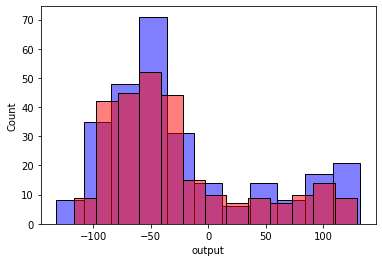

In [57]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [58]:
from sklearn import metrics

MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_RFR)

print('Mean Squared Error: ', MeanSquaredError_RFR)

print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error:  28.38797527386121
Mean Squared Error:  2302.5264183755635
Root Mean Squared Error:  47.98464773628711


## Boosting

## Gradient Boosted Decision Tree

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
1004,-15.000000,-9.025659
899,-97.376142,-82.137281
157,-67.569154,-39.362154
652,-104.595355,-82.137281
469,85.239286,68.862103


<AxesSubplot: xlabel='output', ylabel='Count'>

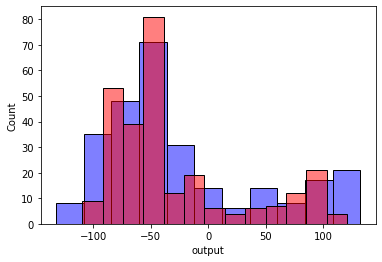

In [60]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [61]:
from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

Mean Absolute Error:  25.164688989688035
Mean Squared Error:  2043.9034903822107
Root Mean Squared Error:  45.20955087569673


## Adaptive Boosting

In [62]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
1004,-15.000000,-12.509221
899,-97.376142,-65.946992
157,-67.569154,-65.946992
652,-104.595355,-65.946992
469,85.239286,76.863888


<AxesSubplot: xlabel='output', ylabel='Count'>

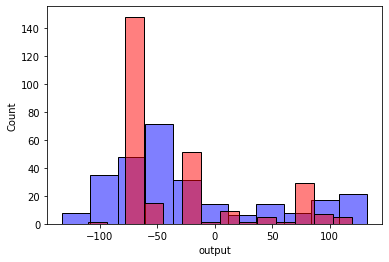

In [63]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [64]:
from sklearn import metrics

MeanAbsoluteError_ADB = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_ADB = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_ADB = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                                                
print('Mean Absolute Error: ', MeanAbsoluteError_ADB)

print('Mean Squared Error: ', MeanSquaredError_ADB)

print('Root Mean Squared Error: ', RootMeanSquaredError_ADB)

Mean Absolute Error:  30.401447261951972
Mean Squared Error:  2029.0433536908506
Root Mean Squared Error:  45.044903748269356


In [65]:
df_data = [['Linear Regression',round(MeanAbsoluteError_LR,2), round(MeanSquaredError_LR,2), round(RootMeanSquaredError_LR,2)],
                   ['K-Nearest Neighbor Regression', round(MeanAbsoluteError_KNN,2), round(MeanSquaredError_KNN,2), round(RootMeanSquaredError_KNN,2)],
                   ['Decision Tree Regression', round(MeanAbsoluteError_DTR,2), round(MeanSquaredError_DTR,2), round(RootMeanSquaredError_DTR,2)],
                   ['Random Forest Regression ', round(MeanAbsoluteError_RFR,2), round(MeanSquaredError_RFR,2), round(RootMeanSquaredError_RFR,2)],
                   ['Gradient Boosting Decision Tree', round(MeanAbsoluteError_GBDT,2),round(MeanSquaredError_GBDT,2), round(RootMeanSquaredError_GBDT,2)],
          ['Adaptive Boosting', round(MeanAbsoluteError_ADB,2), round(MeanSquaredError_ADB,2), round(RootMeanSquaredError_ADB,2)]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Mean_Absolute_Error','Mean_Square_Error','Root_Mean_Square_Error'])

In [66]:
data

,Algorithm,Mean_Absolute_Error,Mean_Square_Error,Root_Mean_Square_Error
0,Linear Regression,46.29,3953.23,62.87
1,K-Nearest Neighbor Regression,26.98,2096.74,45.79
2,Decision Tree Regression,30.91,2913.66,53.98
3,Random Forest Regression,28.39,2302.53,47.98
4,Gradient Boosting Decision Tree,25.16,2043.90,45.21
5,Adaptive Boosting,30.40,2029.04,45.04


In [67]:
# plt.figure(figsize=(15,9))
# plt.subplot(311)
# sns.barplot(y=data.Algorithm, x = data.Mean_Absolute_Error)
# 
# plt.subplot(312)
# sns.boxplot(y=data.Algorithm, x = data.Mean_Square_Error);
# 
# plt.subplot(313)
# sns.boxplot(y=data.Algorithm, x = data.Root_Mean_Square_Error);

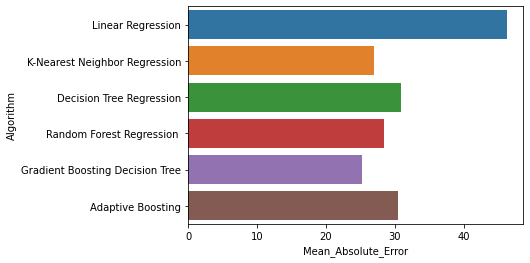

In [68]:
sns.barplot(y=data.Algorithm, x = data.Mean_Absolute_Error);


## Observation

**1. By observing the above table we can say that Gradient Boosting Decision Tree Mean absolute error is less i.e. 25.16 compaired to other algorithms.**

**2. By compairing all algorithms we can easily says that Gradient Boosting Decision Tree is the best algorithm for the output prediction.**

## Conclusion

**Gradient Boosting Decision Tree is the best algorithm for the output prediction.**
